# **Dengue Prediction**

## **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sb
import plotly.figure_factory as px
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit

## **Loading The Dataset**

In [2]:
df = pd.read_csv("dengue.csv")
df

,p_i_d,date_of_fever,residence,days,current_temp,wbc,servere_headche,pain_behind_the_e1,joint_muscle_aches,metallic_taste_in_the_mouth,appetite_loss,addominal_pain,nausea_vomiting,diarrhoea,hemoglobin,hematocri,platelet,result
0,P012,13-Jan,Bangalore,10 days,100.0,5.0,1,0,0,1,1,1,0,1,15.0,NaN,140.0,1
1,P011,13-Feb,New Delhi,4 days,104.0,1.0,0,1,1,0,0,0,0,0,9.0,22.0,80.0,0
2,P010,9-Jan,Jamica,5 days,104.0,5.0,1,0,0,1,1,1,1,0,NaN,NaN,120.0,1
3,P009,12-Aug,Barbados,12 months,101.0,NaN,1,1,0,0,0,0,0,0,NaN,NaN,NaN,0
4,P008,12-Oct,St.Martin,3 days,101.0,NaN,1,0,0,0,0,0,1,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,P005,12-Jun,Thiland,2 weeks,103.5,2.2,1,1,0,1,0,0,0,0,10.0,25.0,110.0,1
104,P004,10-Sep,Jamica,3--4,103.0,NaN,1,1,1,0,0,0,0,0,NaN,NaN,NaN,0
105,P003,12-Jun,WestIndies,2 weeks,101.0,NaN,1,0,1,0,0,1,0,0,NaN,NaN,NaN,1
106,P002,12-Feb,Thiland,3--4,105.0,NaN,1,0,1,0,1,0,1,0,NaN,NaN,NaN,1


In [3]:
df.drop(['p_i_d', 'date_of_fever','residence','days'], axis=1,inplace=True)
df

,current_temp,wbc,servere_headche,pain_behind_the_e1,joint_muscle_aches,metallic_taste_in_the_mouth,appetite_loss,addominal_pain,nausea_vomiting,diarrhoea,hemoglobin,hematocri,platelet,result
0,100.0,5.0,1,0,0,1,1,1,0,1,15.0,NaN,140.0,1
1,104.0,1.0,0,1,1,0,0,0,0,0,9.0,22.0,80.0,0
2,104.0,5.0,1,0,0,1,1,1,1,0,NaN,NaN,120.0,1
3,101.0,NaN,1,1,0,0,0,0,0,0,NaN,NaN,NaN,0
4,101.0,NaN,1,0,0,0,0,0,1,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103.5,2.2,1,1,0,1,0,0,0,0,10.0,25.0,110.0,1
104,103.0,NaN,1,1,1,0,0,0,0,0,NaN,NaN,NaN,0
105,101.0,NaN,1,0,1,0,0,1,0,0,NaN,NaN,NaN,1
106,105.0,NaN,1,0,1,0,1,0,1,0,NaN,NaN,NaN,1


In [4]:
def fill_na_with_avg(column):
    avg = column.mean()
    return column.fillna(avg)

df = df.apply(fill_na_with_avg)
df

,current_temp,wbc,servere_headche,pain_behind_the_e1,joint_muscle_aches,metallic_taste_in_the_mouth,appetite_loss,addominal_pain,nausea_vomiting,diarrhoea,hemoglobin,hematocri,platelet,result
0,100.0,5.00,1,0,0,1,1,1,0,1,15.00,23.333333,140.0,1
1,104.0,1.00,0,1,1,0,0,0,0,0,9.00,22.000000,80.0,0
2,104.0,5.00,1,0,0,1,1,1,1,0,10.65,23.333333,120.0,1
3,101.0,3.64,1,1,0,0,0,0,0,0,10.65,23.333333,105.0,0
4,101.0,3.64,1,0,0,0,0,0,1,0,10.65,23.333333,105.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103.5,2.20,1,1,0,1,0,0,0,0,10.00,25.000000,110.0,1
104,103.0,3.64,1,1,1,0,0,0,0,0,10.65,23.333333,105.0,0
105,101.0,3.64,1,0,1,0,0,1,0,0,10.65,23.333333,105.0,1
106,105.0,3.64,1,0,1,0,1,0,1,0,10.65,23.333333,105.0,1


In [5]:
x = np.array(df.drop("result",axis = 1))
y = np.array(df["result"])
y_df = pd.DataFrame(df['result'])

In [6]:
df_reset = df.reset_index(drop=True)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_reset, df_reset['result']):
    strat_train_set = df_reset.loc[train_index]
    strat_test_set = df_reset.loc[test_index]

In [7]:
a = strat_train_set['result'].value_counts()
print(f"Training Samples : {len(strat_train_set)}")
print(f"Train ratio = 1 : {a[0]/a[1]}")

Training Samples : 86
Train ratio = 1 : 0.5087719298245614


In [8]:
b = strat_test_set['result'].value_counts()
print(f"Testing Samples : {len(strat_test_set)}")
print(f"Test ratio = 1  : {b[0]/b[1]}")

Testing Samples : 22
Test ratio = 1  : 0.4666666666666667


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
print(f'''x_train Shape : {x_train.shape}
x_test Shape : {x_test.shape}

''')

x_train Shape : (86, 13)
x_test Shape : (22, 13)




## **Modelling**

In [11]:
model = Sequential([
    Dense(128,activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    Dense(40,activation = 'relu',kernel_regularizer= tf.keras.regularizers.l2(0.1)),
    Dense(1,activation= 'linear')
])

In [13]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=  tf.keras.optimizers.Adam(learning_rate = 0.01),
             metrics = ["accuracy"])

In [14]:
hist_train = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 15.6435 - accuracy: 0.5581
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 11.6946 - accuracy: 0.6628
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 7.6043 - accuracy: 0.6628
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 5.7455 - accuracy: 0.4186
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 3.4684 - accuracy: 0.6860
Epoch 6/100
3/3 [==============================] - 0s 0s/step - loss: 3.2230 - accuracy: 0.6628
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 2.6314 - accuracy: 0.5698
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 2.5518 - accuracy: 0.6163
Epoch 9/100
3/3 [==============================] - 0s 7ms/step - loss: 2.2541 - accuracy: 0.6744
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 2.0909 - accuracy: 0.6628
Epoch 11/100
3/3 [==========

In [15]:
hist_tst = model.fit(x_test,y_test,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 40ms/step - loss: 0.6383 - accuracy: 0.5455
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6381 - accuracy: 0.5455
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6273 - accuracy: 0.6364
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6207 - accuracy: 0.7273
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6231 - accuracy: 0.7273
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6283 - accuracy: 0.7273
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6274 - accuracy: 0.7273
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 0.6217 - accuracy: 0.7273
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.6175 - accuracy: 0.7273
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6179 - accuracy: 0.5000
Epoch 11/100
1/1 [===========

In [16]:
hist_m2_tr = pd.DataFrame(hist_train.history)
hist_m2_tr.rename(columns={'loss':'train loss','accuracy' : "train acc"},inplace=True)
hist_m2_ts = pd.DataFrame(hist_tst.history)
hist_m2_ts.rename(columns={'loss':'test loss',"accuracy":"test acc"},inplace = True)
con = [hist_m2_ts,hist_m2_tr]

comb2 = pd.concat(con,axis=1,join="inner")
comb2

,test loss,test acc,train loss,train acc
0,0.638318,0.545455,15.643532,0.558140
1,0.638061,0.545455,11.694640,0.662791
2,0.627328,0.636364,7.604269,0.662791
3,0.620655,0.727273,5.745485,0.418605
4,0.623139,0.727273,3.468355,0.686047
...,...,...,...,...
95,0.574832,0.727273,0.657024,0.662791
96,0.574299,0.727273,0.655736,0.627907
97,0.573652,0.727273,0.650754,0.651163
98,0.573240,0.727273,0.652239,0.651163


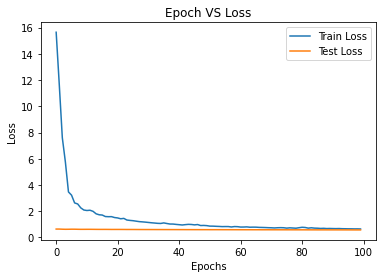

In [17]:
fig,ax = plt.subplots(1,1)
ax.plot(np.arange(100),comb2['train loss'],label = 'Train Loss')
ax.plot(np.arange(100),comb2['test loss'],label = 'Test Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epoch VS Loss")
plt.legend()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                5160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 6,993
Trainable params: 6,993
Non-trainable params: 0
_________________________________________________________________


In [19]:
def my_predict(x,pos=None):
    
    p2 = model.predict(x)
    pr2 = tf.nn.sigmoid(p2)
    a2 = np.zeros(len(pr2))
    for i in range(len(pr2)):
        if pr2[i]>0.5:
            a2[i] = np.array(pr2[i])
            a2[i] =  1
        else :
            a2[i] = np.array(pr2[i])
            a2[i]  = 0

    
    return a2

## **Checking Model Prediction by Confusion Matrix**

In [20]:
prd_train = my_predict(x_train)
cd = confusion_matrix(y_train,prd_train)

In [21]:
cm_display = ConfusionMatrixDisplay(cd)

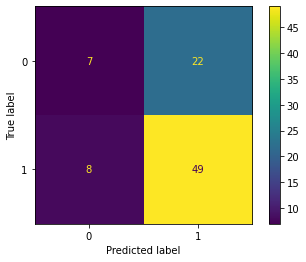

In [22]:
cm_display.plot()
plt.show()

In [23]:
print(classification_report(y_train,prd_train))

              precision    recall  f1-score   support

           0       0.47      0.24      0.32        29
           1       0.69      0.86      0.77        57

    accuracy                           0.65        86
   macro avg       0.58      0.55      0.54        86
weighted avg       0.61      0.65      0.61        86



In [24]:
pre = cd[0,0]/(cd[0,0]+cd[0,1])
rec = cd[0,0]/(cd[0,0]+cd[1,0])
f1 = 2*pre*rec/(pre+rec)

In [25]:
print(f'''Precision : {pre}
Recall : {rec:.2f}
F1 Score : {f1:.2f}''')

Precision : 0.2413793103448276
Recall : 0.47
F1 Score : 0.32


In [27]:
prd_tst1 = my_predict(x_test)

In [28]:
print(f" Model1 Accuracy : {accuracy_score(y_train,prd_train)}")
print(f" Model2 Accuracy : {accuracy_score(y_test,prd_tst1)}")

 Model1 Accuracy : 0.6511627906976745
 Model2 Accuracy : 0.7272727272727273


In [29]:
imp1 = np.array([[0, 11.9, 28.3, 31.9, 88.8, 0, 0, 0, 0, 0, 0, 0, 0]])
my_predict(imp1)


array([0.])

In [30]:
imp2 = np.array([[1, 13.5, 26.9, 32.6, 82.6, 0, 0, 0, 0, 0, 0, 0, 0]])
my_predict(imp2)

array([0.])

In [31]:
tree_cf = DecisionTreeClassifier()
tree_cf.fit(x_train,y_train)

DecisionTreeClassifier()

In [32]:
prd_tree = tree_cf.predict(x_train)
prd_tst_tree = tree_cf.predict(x_test)

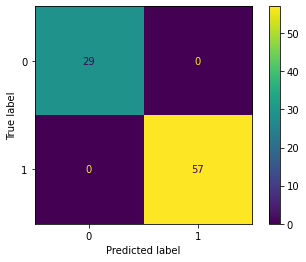

In [33]:
cm_t = confusion_matrix(y_train,prd_tree)
cm_d = ConfusionMatrixDisplay(cm_t)
cm_d.plot()

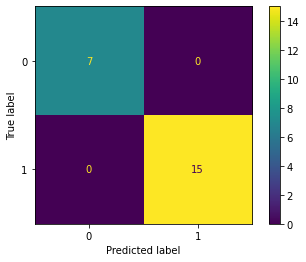

In [34]:
cm_tt = confusion_matrix(y_test,prd_tst_tree)
cm_d = ConfusionMatrixDisplay(cm_tt)
cm_d.plot()

In [35]:
print(classification_report(y_train,prd_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        57

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [36]:
np.mean(cross_val_score(tree_cf,x_train,y_train,cv =10))

1.0

In [37]:
tree_cf.predict(imp1)

array([0], dtype=int64)

In [38]:
tree_cf.predict(imp2)

array([0], dtype=int64)

In [39]:
with open('dengue_detection.pkl', 'wb') as files:
    pickle.dump(tree_cf, files)

In [40]:
with open('dengue_detection.pkl' , 'rb') as f:
    lr = pickle.load(f)